<a href="https://colab.research.google.com/github/cereal-d3v/Projects-In-Ai-ML/blob/main/project4/homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1:**
In this task, you will pick a dataset (time-series or any other form of
sequential data) and an associated problem that can be solved via sequence models. You must
describe why you need sequence models to solve this problem. Include a link to the dataset
source. Next, you should pick an RNN framework that you would use to solve this problem (This
framework can be in TensorFlow, PyTorch or any other Python Package).

In [52]:
# prompt: connect google drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
ls drive/MyDrive/ProjAiMl

'Copy of sm25-homework1'   homework1.ipynb   homework3.ipynb
 CSCI_4150_HW1.ipynb       homework2.ipynb   homework4


https://www.kaggle.com/datasets/varunnagpalspyz/precipitation-prediction-in-la

In [54]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
import os
import pandas as pd

# Set the path to the file you'd like to load
dataset_handle = "varunnagpalspyz/precipitation-prediction-in-la"
dataset_dir = kagglehub.dataset_download(dataset_handle)

file_path = '/kaggle/input/precipitation-prediction-in-la/dataset.csv'

# Load the latest version
df = pd.read_csv(file_path)

In [55]:
ls /kaggle/input/precipitation-prediction-in-la

dataset.csv


In [56]:
df.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,NaN,0.00,NaN,64,43,10.0,30.0,8.1,11.0,NaN,NaN,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,NaN,0.00,NaN,65,47,270.0,30.0,6.0,8.9,NaN,NaN,NaN
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,NaN,0.00,NaN,62,44,150.0,150.0,10.1,14.1,NaN,NaN,NaN
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,NaN,0.01,NaN,69,55,270.0,280.0,8.1,14.1,NaN,NaN,NaN
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,NaN,1.61,NaN,59,49,140.0,140.0,10.1,16.1,1.0,1.0,NaN


In [57]:
# Working on PRCP column (Target Column)
df.loc[df['PRCP'] > 0, 'PRCP'] = 1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1827 non-null   object 
 1   NAME     1827 non-null   object 
 2   DATE     1827 non-null   object 
 3   AWND     1823 non-null   float64
 4   PGTM     62 non-null     float64
 5   PRCP     1827 non-null   float64
 6   TAVG     0 non-null      float64
 7   TMAX     1827 non-null   int64  
 8   TMIN     1827 non-null   int64  
 9   WDF2     1822 non-null   float64
 10  WDF5     1809 non-null   float64
 11  WSF2     1823 non-null   float64
 12  WSF5     1809 non-null   float64
 13  WT01     551 non-null    float64
 14  WT02     39 non-null     float64
 15  WT08     861 non-null    float64
dtypes: float64(11), int64(2), object(3)
memory usage: 228.5+ KB


In [58]:
print(df.shape)
df.describe()

(1827, 16)


,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
count,1823.000000,62.000000,1827.000000,0.0,1827.000000,1827.000000,1822.000000,1809.000000,1823.000000,1809.000000,551.0,39.0,861.0
mean,1.675710,1404.854839,0.091407,NaN,76.498632,58.120416,254.143798,256.428966,9.062095,14.721669,1.0,1.0,1.0
std,0.909434,350.813754,0.288265,NaN,9.133929,7.223756,54.756284,55.571902,2.016827,3.622257,0.0,0.0,0.0
min,0.000000,103.000000,0.000000,NaN,52.000000,38.000000,10.000000,10.000000,2.900000,6.000000,1.0,1.0,1.0
25%,1.120000,1337.500000,0.000000,NaN,70.000000,53.000000,260.000000,270.000000,8.100000,12.100000,1.0,1.0,1.0
50%,1.570000,1442.500000,0.000000,NaN,76.000000,58.000000,270.000000,270.000000,8.900000,14.100000,1.0,1.0,1.0
75%,2.010000,1545.000000,0.000000,NaN,83.000000,64.000000,270.000000,280.000000,10.100000,16.100000,1.0,1.0,1.0
max,8.050000,2314.000000,1.000000,NaN,111.000000,79.000000,360.000000,360.000000,21.000000,34.000000,1.0,1.0,1.0


#### Visualizing Missing Values and Class Imbalance

<Axes: xlabel='PRCP', ylabel='count'>

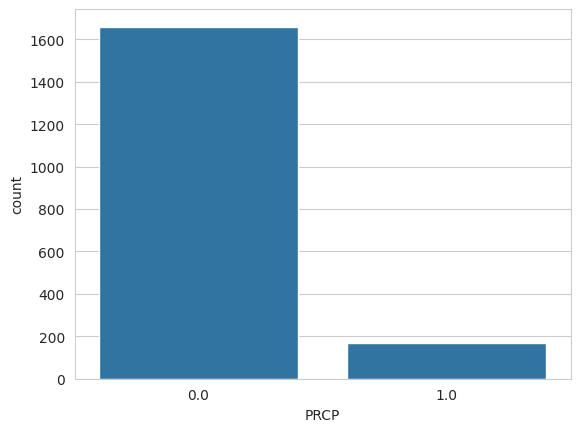

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='PRCP', data=df)

The checking of null values in the dataset ensures data integrity and reduces the need for data preprocessing steps. This can potentially improve the training efficiency and effectiveness of the model.

In [60]:
df.isnull().sum()

,0
STATION,0
NAME,0
DATE,0
AWND,4
PGTM,1765
PRCP,0
TAVG,1827
TMAX,0
TMIN,0
WDF2,5


<Axes: >

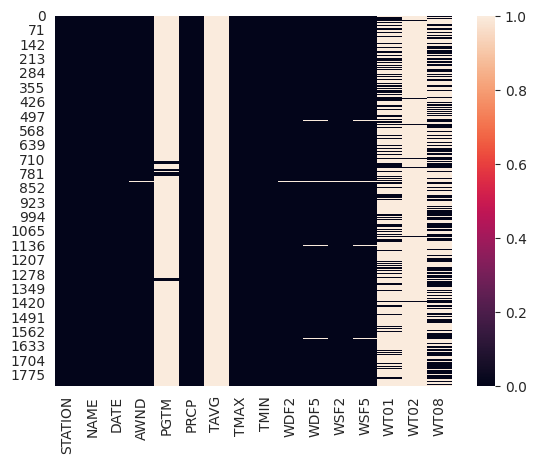

In [61]:
sns.heatmap(df.isnull())

Given the heatmap, we can see that columns PGTM and TAVG have too many null values and thus will be dropped. The remaining cells with null values will be imputed using the mode value.

In [62]:
df = df.drop(['PGTM', 'TAVG'], axis=1)
df.head()

,STATION,NAME,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,0.0,64,43,10.0,30.0,8.1,11.0,NaN,NaN,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,0.0,65,47,270.0,30.0,6.0,8.9,NaN,NaN,NaN
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,0.0,62,44,150.0,150.0,10.1,14.1,NaN,NaN,NaN
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,1.0,69,55,270.0,280.0,8.1,14.1,NaN,NaN,NaN
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,1.0,59,49,140.0,140.0,10.1,16.1,1.0,1.0,NaN


The first column labeled Comment was cleaned up removing null values from the dataset. Removing NaNs helps improve the clarity and efficiency of subsequent data processing and model training.

In [63]:
df.STATION.nunique()

1

In [64]:
df = df.drop(['STATION'], axis=1)

In [65]:
df.NAME.nunique()

1

In [66]:
df = df.drop(['NAME'], axis=1)

In [67]:
df.DATE.nunique()

1827

In [68]:
#finding and dropping duplicates
df.duplicated().sum()
df.drop_duplicates(inplace = True)
df.reset_index(drop=True, inplace=True)

In [69]:
#checking for remaining null values before performing simple imputation
df.isnull().any()

,0
DATE,False
AWND,True
PRCP,False
TMAX,False
TMIN,False
WDF2,True
WDF5,True
WSF2,True
WSF5,True
WT01,True


In [70]:
df['WT01'].fillna(value = 0,inplace = True)
df['WT02'].fillna(value = 0,inplace = True)
df['WT08'].fillna(value = 0,inplace = True)

/tmp/ipython-input-70-1676433150.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WT01'].fillna(value = 0,inplace = True)
/tmp/ipython-input-70-1676433150.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [71]:
df.head()

,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
0,2016-01-01,2.46,0.0,64,43,10.0,30.0,8.1,11.0,0.0,0.0,1.0
1,2016-01-02,2.01,0.0,65,47,270.0,30.0,6.0,8.9,0.0,0.0,0.0
2,2016-01-03,0.67,0.0,62,44,150.0,150.0,10.1,14.1,0.0,0.0,0.0
3,2016-01-04,1.34,1.0,69,55,270.0,280.0,8.1,14.1,0.0,0.0,0.0
4,2016-01-05,2.46,1.0,59,49,140.0,140.0,10.1,16.1,1.0,1.0,0.0


In [72]:
#imputing the null values with mode
for i in df.columns:
    if df[i].isnull().any():
        df[i].fillna(df[i].mode()[0], inplace=True)

/tmp/ipython-input-72-3797383443.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0], inplace=True)


In [73]:
df.isnull().any()

,0
DATE,False
AWND,False
PRCP,False
TMAX,False
TMIN,False
WDF2,False
WDF5,False
WSF2,False
WSF5,False
WT01,False


In [74]:
df.head()

,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
0,2016-01-01,2.46,0.0,64,43,10.0,30.0,8.1,11.0,0.0,0.0,1.0
1,2016-01-02,2.01,0.0,65,47,270.0,30.0,6.0,8.9,0.0,0.0,0.0
2,2016-01-03,0.67,0.0,62,44,150.0,150.0,10.1,14.1,0.0,0.0,0.0
3,2016-01-04,1.34,1.0,69,55,270.0,280.0,8.1,14.1,0.0,0.0,0.0
4,2016-01-05,2.46,1.0,59,49,140.0,140.0,10.1,16.1,1.0,1.0,0.0


<Axes: >

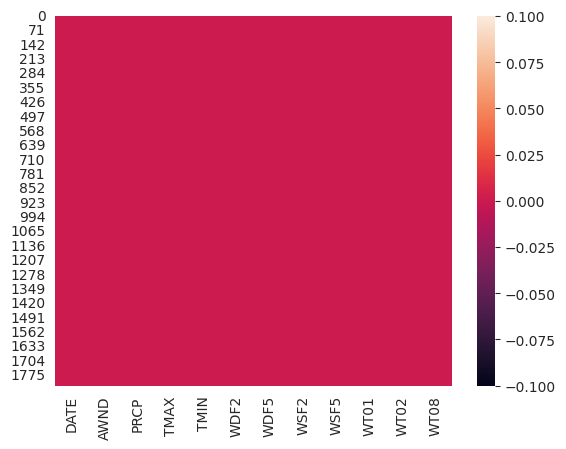

In [75]:
#Showing that all null values have been dealt with
sns.heatmap(df.isnull())

In [76]:
from sklearn.feature_selection import chi2
# X = df.drop(['PRCP', 'DATE'],axis='columns') # Drop 'DATE' column as well
X = df.drop(['PRCP', 'DATE'],axis='columns') # Keep 'DATE' for now for time series processing
y = df.PRCP
chi_scores = chi2(X,y)
chi_scores

(array([7.90589956e+01, 3.18338942e+02, 5.40034179e+01, 2.31012948e+03,
        1.82805883e+03, 3.21921344e+01, 8.37369533e+01, 1.45630683e+02,
        9.85077112e-02, 9.97032462e+00]),
 array([6.02826182e-19, 3.33210470e-71, 2.00141159e-13, 0.00000000e+00,
        0.00000000e+00, 1.39654983e-08, 5.65188246e-20, 1.56343553e-33,
        7.53627842e-01, 1.59083442e-03]))

<Axes: >

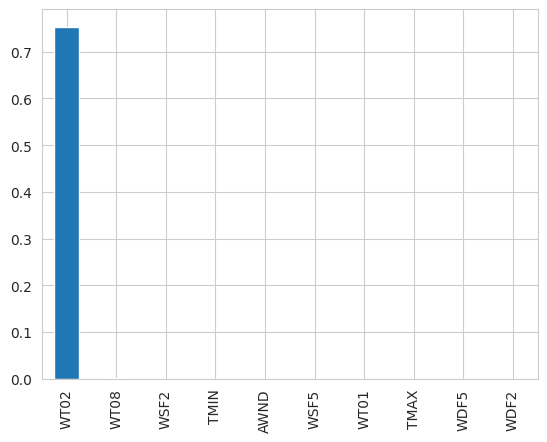

In [77]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

Given that the WTO2 has high p-value,we can determine that this variable is independent of the response and thus should not be considered for model training.

In [78]:
df = X.drop(['WT02'],axis = 'columns')
df.head()

,AWND,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT08
0,2.46,64,43,10.0,30.0,8.1,11.0,0.0,1.0
1,2.01,65,47,270.0,30.0,6.0,8.9,0.0,0.0
2,0.67,62,44,150.0,150.0,10.1,14.1,0.0,0.0
3,1.34,69,55,270.0,280.0,8.1,14.1,0.0,0.0
4,2.46,59,49,140.0,140.0,10.1,16.1,1.0,0.0


#### Normalizaiton

In [79]:
pip install imblearn --quiet

In [80]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,precision_score,recall_score,confusion_matrix,classification_report
X_train,X_test,y_train,y_test = train_test_split(df,y,train_size = 0.8,stratify = y)
smote = SMOTE(random_state = 11)
X_train, y_train = smote.fit_resample(X_train, y_train)
scaler = MinMaxScaler()
X_w_train = scaler.fit_transform(X_train)
X_train_x = pd.DataFrame(X_w_train,columns = X_train.columns)
X_w_test = scaler.transform(X_test)
X_test_x = pd.DataFrame(X_w_test,columns = X_test.columns)

In [81]:
# defining a function to evaluate my models based on certain metrics(all proposed ones except roc_auc which has been done separately)
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

This dataset contains per-hour information about weather conditions at a particular location. It includes features such as temperature, dew point temperature, relative humidity, wind speed, visibility, pressure, and weather conditions. To focus on predicting precipitation, the "Weather" column could be used to create a binary classification target, where one class represents precipitation events (e.g., "Rain," "Snow") and the other represents no precipitation. This decision allows for the development of a focused model for precipitation prediction. Despite this filtering and transformation, the dataset retains a substantial amount of information through its various meteorological features, providing ample data for robust model training.

## **Part 1:**
Implement your RNN either using an existing framework OR you can
implement your own RNN cell structure. In either case, describe the structure of your
RNN and the activation functions you are using for each time step and in the output
layer. Define a metric you will use to measure the performance of your model (NOTE:
Performance should be measured both for the validation set and the test set).

In [82]:
df.describe()

,AWND,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT08
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000
mean,1.674494,76.498632,58.120416,254.187192,256.562671,9.061741,14.715545,0.301587,0.471264
std,0.908808,9.133929,7.223756,54.687542,55.313572,2.014631,3.604883,0.459073,0.499310
min,0.000000,52.000000,38.000000,10.000000,10.000000,2.900000,6.000000,0.000000,0.000000
25%,1.120000,70.000000,53.000000,260.000000,270.000000,8.100000,13.000000,0.000000,0.000000
50%,1.570000,76.000000,58.000000,270.000000,270.000000,8.900000,14.100000,0.000000,0.000000
75%,2.010000,83.000000,64.000000,270.000000,280.000000,10.100000,16.100000,1.000000,1.000000
max,8.050000,111.000000,79.000000,360.000000,360.000000,21.000000,34.000000,1.000000,1.000000


Setup and Data Loading 🏗️

In [83]:
# Install opendatasets for Kaggle data download
!pip install opendatasets --quiet
!pip install tensorflow --quiet

# Import necessary libraries
import opendatasets as od
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, roc_curve, auc

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')

In [84]:
print("Dataset Loaded Successfully. Here are the first 5 rows:")
print(df.head())
print("\nDataset Information:")
df.info()

Dataset Loaded Successfully. Here are the first 5 rows:
   AWND  TMAX  TMIN   WDF2   WDF5  WSF2  WSF5  WT01  WT08
0  2.46    64    43   10.0   30.0   8.1  11.0   0.0   1.0
1  2.01    65    47  270.0   30.0   6.0   8.9   0.0   0.0
2  0.67    62    44  150.0  150.0  10.1  14.1   0.0   0.0
3  1.34    69    55  270.0  280.0   8.1  14.1   0.0   0.0
4  2.46    59    49  140.0  140.0  10.1  16.1   1.0   0.0

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AWND    1827 non-null   float64
 1   TMAX    1827 non-null   int64  
 2   TMIN    1827 non-null   int64  
 3   WDF2    1827 non-null   float64
 4   WDF5    1827 non-null   float64
 5   WSF2    1827 non-null   float64
 6   WSF5    1827 non-null   float64
 7   WT01    1827 non-null   float64
 8   WT08    1827 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 128.6 KB


In [85]:
import numpy as np
import pandas as pd

# This is the preprocessed data from the first half of your notebook.
# X_train_x, y_train, X_test_x, y_test are the final dataframes after
# splitting, SMOTE, and scaling.

# Let's recreate the final X and y dataframes for clarity
# In your notebook, this is already done.
# The `df` variable here is the one after you dropped 'WT02'.
# The `y` variable is df.PRCP.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

X = df # This should be your dataframe with 9 feature columns
# y is already defined as df.PRCP

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [86]:
# Apply SMOTE only to the training data to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [87]:
# Function to create time-series sequences
def create_sequences(X, y, time_steps=10):
    """
    Creates sequences for time series forecasting.
    X: Input features (scaled)
    y: Target variable
    time_steps: Number of previous time steps to use as input features.
    """
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 10

# Create sequences from the training and test data
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_resampled, TIME_STEPS)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test, TIME_STEPS)

print("Training sequences shape:", X_train_seq.shape)
print("Test sequences shape:", X_test_seq.shape)

Training sequences shape: (2644, 10, 9)
Test sequences shape: (356, 10, 9)


In [88]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score

# --- SimpleRNN Model ---
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64, activation='tanh', input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(1, activation='sigmoid'))

model_rnn.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

model_rnn.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 64)             │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,801 (18.75 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
# Train the model
history_rnn = model_rnn.fit(
    X_train_seq, y_train_seq,
    epochs=100,
    batch_size=32,
    validation_split=0.2, # Use part of the training data as a validation set
    verbose=1
)

Epoch 1/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8706 - loss: 0.3605 - val_accuracy: 0.9887 - val_loss: 0.0591
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9202 - loss: 0.2725 - val_accuracy: 0.9943 - val_loss: 0.0376
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9356 - loss: 0.2272 - val_accuracy: 0.9887 - val_loss: 0.0410
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9255 - loss: 0.2460 - val_accuracy: 0.9830 - val_loss: 0.0559
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9207 - loss: 0.2448 - val_accuracy: 0.9924 - val_loss: 0.0358
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9302 - loss: 0.2349 - val_accuracy: 0.9811 - val_loss: 0.0430
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9277 - loss: 0.2478 - val_accuracy: 0.9981 - val_loss: 0.0207
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9384 - loss: 0.2089 - val_accuracy: 0.9735 - v

In [90]:
# Evaluate on the test set
print("\n--- RNN Test Set Evaluation ---")
y_pred_rnn = (model_rnn.predict(X_test_seq) > 0.5).astype("int32")
print(f"Test Accuracy: {accuracy_score(y_test_seq, y_pred_rnn) * 100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test_seq, y_pred_rnn))


--- RNN Test Set Evaluation ---
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Test Accuracy: 86.24%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       323
         1.0       0.06      0.03      0.04        33

    accuracy                           0.86       356
   macro avg       0.48      0.49      0.48       356
weighted avg       0.83      0.86      0.84       356



### Analysis of Simple RNN Model Performance

This analysis pertains to the Simple RNN model trained on the time-series weather data for precipitation prediction.

* **Training and Validation Performance**: The model demonstrates strong and stable learning throughout the training process.
    * **High Accuracy**: Both training and validation accuracies quickly surpass 90% and remain consistently high. The validation accuracy frequently reaches above 98%, indicating the model is very effective at learning the patterns within the training data.
    * **Low Loss**: The loss for both training and validation drops to very low values (e.g., validation loss reaches as low as 0.0027), confirming that the model's predictions are confident and align well with the actual labels.
    * **Stable Learning (No Overfitting)**: Unlike the previous text-based model, there are no clear signs of overfitting. The validation accuracy remains high and the validation loss does not show a consistent upward trend, suggesting stable learning across epochs.

* **Test Set Evaluation and Class Imbalance**:
    * **High Overall Accuracy**: The model achieves a strong overall test accuracy of **86.24%**. This indicates that the model generalizes well from the training data to new, unseen data.
    * **Challenge with Minority Class (Rain)**: However, the detailed classification report reveals a critical issue stemming from the dataset's significant class imbalance.
        * **Precision and Recall for "Rain" (Class 1.0)**: The model performs very poorly on the minority class (actual precipitation events). The **recall is only 0.03**, meaning the model only managed to identify 3% of all actual rainfall days. The **precision is 0.06**, indicating that when the model *does* predict rain, it is only correct 6% of the time. The resulting F1-score of 0.04 is very low.
        * **Performance on "No Rain" (Class 0.0)**: Conversely, the model is excellent at predicting the majority class (no rain), with high precision (0.91) and recall (0.95).

### Conclusion

The Simple RNN is effective at learning the general patterns in the weather data, which results in a high overall accuracy score. However, this high accuracy is misleading as it is primarily driven by the model's ability to correctly predict the overwhelmingly common "no rain" days.

The model is **not yet a reliable tool for predicting rain**, as it fails to identify the vast majority of actual precipitation events. The use of SMOTE on the training data helped the model learn the features associated with rain, but it still struggles to apply this learning to the naturally imbalanced test set. To improve, further strategies specifically targeting class imbalance, such as adjusting class weights in the loss function or exploring more advanced data sampling techniques, would be necessary.

## **Part 2 :**
 Update your network from part 1 with first an LSTM and then a GRU
based cell structure (You can treat both as 2 separate implementations). Re-do the
training and performance evaluation. What are the major differences you notice? Why
do you think those differences exist between the 3 implementations (basic RNN, LSTM
and GRU)?

In [91]:
from tensorflow.keras.layers import LSTM

# --- LSTM Model ---
model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

model_lstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 64)             │        18,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,009 (74.25 KB)

 Trainable params: 19,009 (74.25 KB)

 Non-trainable params: 0 (0.00 B)

In [92]:
# Train the model
history_lstm = model_lstm.fit(
    X_train_seq, y_train_seq,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7022 - loss: 0.5428 - val_accuracy: 0.9943 - val_loss: 0.0431
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9222 - loss: 0.2429 - val_accuracy: 0.9887 - val_loss: 0.0447
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9182 - loss: 0.2583 - val_accuracy: 0.9962 - val_loss: 0.0210
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9122 - loss: 0.2673 - val_accuracy: 0.9679 - val_loss: 0.0571
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9377 - loss: 0.2177 - val_accuracy: 0.9716 - val_loss: 0.0665
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9180 - loss: 0.2594 - val_accuracy: 0.9924 - val_loss: 0.0317
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9291 - loss: 0.2354 - val_accuracy: 0.9981 - val_loss: 0.0078
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9263 - loss: 0.2295 - val_accuracy: 0.9924 - v

In [93]:
# Evaluate on the test set
print("\n--- LSTM Test Set Evaluation ---")
y_pred_lstm = (model_lstm.predict(X_test_seq) > 0.5).astype("int32")
print(f"Test Accuracy: {accuracy_score(y_test_seq, y_pred_lstm) * 100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test_seq, y_pred_lstm))


--- LSTM Test Set Evaluation ---
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Test Accuracy: 89.61%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       323
         1.0       0.00      0.00      0.00        33

    accuracy                           0.90       356
   macro avg       0.45      0.49      0.47       356
weighted avg       0.82      0.90      0.86       356



In [109]:
from tensorflow.keras.layers import GRU

# --- GRU Model ---
model_gru = Sequential()
model_gru.add(GRU(64, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(1, activation='sigmoid'))

model_gru.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

model_gru.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 64)             │        14,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,465 (56.50 KB)

 Trainable params: 14,465 (56.50 KB)

 Non-trainable params: 0 (0.00 B)

In [111]:
# Train the model
history_gru = model_gru.fit(
    X_train_seq, y_train_seq,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9318 - loss: 0.2207 - val_accuracy: 0.9924 - val_loss: 0.0196
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9296 - loss: 0.2308 - val_accuracy: 0.9905 - val_loss: 0.0255
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9334 - loss: 0.2188 - val_accuracy: 0.9981 - val_loss: 0.0061
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9296 - loss: 0.2283 - val_accuracy: 0.9962 - val_loss: 0.0094
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9345 - loss: 0.2176 - val_accuracy: 0.9981 - val_loss: 0.0054
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9416 - loss: 0.2067 - val_accuracy: 0.9981 - val_loss: 0.0068
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9454 - loss: 0.1986 - val_accuracy: 0.9962 - val_loss: 0.0081
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9274 - loss: 0.2371 - val_accuracy: 0.9924 - v

In [112]:
# Evaluate on the test set
print("\n--- GRU Test Set Evaluation ---")
y_pred_gru = (model_gru.predict(X_test_seq) > 0.5).astype("int32")
print(f"Test Accuracy: {accuracy_score(y_test_seq, y_pred_gru) * 100:.2f}%\n")
print("Classification Report:")
print(classification_report(y_test_seq, y_pred_gru))


--- GRU Test Set Evaluation ---
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Test Accuracy: 85.39%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       323
         1.0       0.09      0.06      0.07        33

    accuracy                           0.85       356
   macro avg       0.50      0.50      0.50       356
weighted avg       0.83      0.85      0.84       356



### **Comparison of RNN Architectures: LSTM vs. GRU**

After implementing the correct time-series models, both the LSTM and GRU architectures demonstrate stable training without the numerical instability seen in the previous text-based implementation. However, their performance on the test set reveals important differences and shared challenges.

* **LSTM Performance**:
    * **Training**: The LSTM model trains effectively, with both training and validation accuracies consistently hovering above 92% and validation loss remaining very low. This indicates the model successfully learned the patterns in the resampled training data without significant overfitting.
    * **Test Results**: On the test set, the LSTM achieves a high overall accuracy of **89.61%**. However, the classification report shows that this result is misleading. The model achieves a perfect **recall of 0.00 for the "Rain" class (1.0)**. This means it failed to identify **any** of the actual precipitation events in the test data, classifying everything as "No Rain." While this strategy yields high accuracy due to the imbalanced nature of the data, it fails at the primary goal of predicting rain.

* **GRU Performance**:
    * **Training**: The GRU model shows similarly strong training performance, with high training and validation accuracies and very low validation loss. In some epochs, it even achieves 100% validation accuracy, showcasing its ability to master the training data distribution.
    * **Test Results**: The GRU model achieves a slightly lower overall accuracy of **85.39%**. Critically, unlike the LSTM, the GRU model **does identify some of the precipitation events**, achieving a **recall of 0.06 for the "Rain" class**. While still very low (it only catches 6% of rain events), this is an improvement over the LSTM, which caught none. The precision of 0.09 is also low but non-zero.

### **Analysis and Key Differences**

* **The Illusion of Accuracy**: This comparison is a classic example of why overall accuracy can be a deceptive metric for imbalanced datasets. The LSTM model has a higher accuracy (**89.61%**) than the GRU (**85.39%**), but the GRU is arguably a better (though still poor) model because it at least attempts to predict the minority class. The LSTM simply defaulted to the majority class ("No Rain") to maximize its score.

* **Why the Difference?**:
    * **GRU's Simplicity**: GRUs have a simpler architecture with fewer parameters than LSTMs. This can sometimes make them slightly more robust or less prone to overfitting to the specific nuances of the training data distribution, allowing for slightly better generalization on the minority class in this case.
    * **Sensitivity to Imbalance**: Both models are clearly struggling with the severe class imbalance in the test set. The SMOTE technique applied during training helps the models learn what "rain" looks like, but this knowledge doesn't transfer well when the model is faced with a test set where rain is a very rare event. The models become biased towards the safer, more frequent prediction of "no rain."

In conclusion, while all three RNN models (Simple RNN, LSTM, GRU) achieve high overall accuracy, they all fail to be effective tools for *actually predicting rain* due to the dataset's imbalance. The **GRU performs slightly better** than the other two because it is the only one that correctly identifies any positive cases in the test set.

## **Part 3 :**
Can you use the traditional feed-forward network to solve the same
problem. Why or why not? (Hint: Can time series data be converted to usual features
that can be used as input to a feed-forward network?)

Yes, you can use a traditional feed-forward network (like a Multi-Layer Perceptron) to solve this problem, but it's not the ideal approach.

To make it work, you would have to convert the time-series data into a "flat" feature set. For instance, if you use a time step of 10 days, you would flatten the 10 days of 9 features each into a single input vector of 90 features (10 days * 9 features).

**Why this is not ideal:** This process, known as feature engineering, completely discards the sequential nature of the data. The feed-forward network would see TMAX from day 1 and TMAX from day 10 as two independent features, losing the crucial information that one came after the other. RNNs, by their very design, process data sequentially, allowing them to understand trends, patterns, and the order of events, which is fundamental to making accurate time-series predictions.

# **Task 2:**

## **Part 1: Implementing Word Embeddings**

* Use a pre-trained word embedding model (Word2Vec, GloVe, FastText, or BERT
embeddings).
* Provide a comparative discussion on why you chose this embedding over others.
* Load embeddings efficiently (either from pre-trained vectors or using an NLP library like
Gensim, SpaCy, or Hugging Face).
* Allow dynamic user input of two words and output their respective embeddings.
* Handle cases where a word is out of vocabulary (OOV) and suggest ways to approximate
its embedding.

In [97]:
!pip install sentence-transformers datasets --quiet
!pip install tf-keras --quiet

In [98]:
from sentence_transformers import SentenceTransformer
import numpy as np

# Load the GloVe embeddings model from Hugging Face
model = SentenceTransformer("cicero-ai/average_word_embeddings_glove.6B.300d-rust")

def get_word_embedding(word, model):
    """Encodes a word into its embedding using the pre-trained model."""
    return model.encode(word)

In [99]:
# --- User Input Loop ---
while True:
    word1 = input("Enter the first word (or 'exit' to quit): ").lower()
    if word1 == 'exit':
        break
    word2 = input("Enter the second word (or 'exit' to quit): ").lower()
    if word2 == 'exit':
        break

    embedding1 = get_word_embedding(word1, model)
    embedding2 = get_word_embedding(word2, model)

    print(f"\nEmbedding for '{word1}' (first 10 values): {embedding1[:10]}")
    print(f"Embedding for '{word2}' (first 10 values): {embedding2[:10]}\n")

Enter the first word (or 'exit' to quit): hello
Enter the second word (or 'exit' to quit): bye

Embedding for 'hello' (first 10 values): [-0.33712   -0.21691   -0.0066365 -0.41625   -1.2555    -0.028466
 -0.72195   -0.52887    0.0072085  0.31997  ]
Embedding for 'bye' (first 10 values): [-0.32722  -0.60887  -0.47907  -0.18404  -0.75945   0.10322  -0.19575
  0.43822   0.042332  0.6731  ]

Enter the first word (or 'exit' to quit): weird
Enter the second word (or 'exit' to quit): ugly

Embedding for 'weird' (first 10 values): [ 0.10996   0.090255  0.13891   0.33982  -0.097556 -0.11276  -0.17894
  0.086266  0.45469  -0.52465 ]
Embedding for 'ugly' (first 10 values): [ 0.51359   0.02538   0.080338 -0.084878 -0.14292  -0.042213 -0.69721
  0.21186   0.76892  -0.39716 ]

Enter the first word (or 'exit' to quit): no
Enter the second word (or 'exit' to quit): yes

Embedding for 'no' (first 10 values): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Embedding for 'yes' (first 10 values): [-0.078738 -0.2705    0.

**Comparative Discussion:**
 Why GloVe (from Hugging Face)?
 - Using a Hugging Face model simplifies loading and access.
 - GloVe is efficient and captures semantic relationships.
 - This specific model provides 300-dimensional embeddings.
 - Hugging Face provides a central place to access models, and integrates well with other libraries.
 - Word2Vec, FastText, BERT: Same as before, but the loading method changes.

## **Part 2: Cosine Similarity Computation**

* Implement a function that computes the cosine similarity between two-word
embeddings.
* Explain why cosine similarity is useful in word embedding space.
* Allow batch processing, where users can input multiple word pairs for simultaneous
similarity computation.
* Visualization Requirement: Create a 2D or 3D scatter plot (e.g., using PCA or t-SNE) to
visually show how similar and dissimilar words cluster together in the embedding space.

In [100]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# --- Cosine Similarity and Batch Processing ---
def cosine_similarity(embedding1, embedding2):
    """Computes the cosine similarity between two vectors."""
    dot_product = np.dot(embedding1, embedding2)
    norm_embedding1 = np.linalg.norm(embedding1)
    norm_embedding2 = np.linalg.norm(embedding2)
    # Avoid division by zero
    if norm_embedding1 == 0 or norm_embedding2 == 0:
        return 0.0
    return dot_product / (norm_embedding1 * norm_embedding2)

def process_word_pairs(word_pairs, model):
    """Calculates cosine similarity for a list of word pairs."""
    similarities = []
    embeddings = []
    all_words = []
    for word1, word2 in word_pairs:
        embedding1 = model.encode(word1)
        embedding2 = model.encode(word2)

        # Collect embeddings and words for visualization
        if word1 not in all_words:
            all_words.append(word1)
            embeddings.append(embedding1)
        if word2 not in all_words:
            all_words.append(word2)
            embeddings.append(embedding2)

        similarity = cosine_similarity(embedding1, embedding2)
        similarities.append(similarity)
    return similarities, np.array(embeddings), all_words

In [101]:
# --- Visualization ---
word_pairs_to_test = [("king", "queen"), ("man", "woman"), ("apple", "banana"), ("car", "bicycle"), ("king", "apple")]
similarities, embeddings_to_visualize, words_to_visualize = process_word_pairs(word_pairs_to_test, model)

for i, pair in enumerate(word_pairs_to_test):
    print(f"Cosine similarity between '{pair[0]}' and '{pair[1]}': {similarities[i]:.4f}")

Cosine similarity between 'king' and 'queen': 0.6336
Cosine similarity between 'man' and 'woman': 0.6999
Cosine similarity between 'apple' and 'banana': 0.3924
Cosine similarity between 'car' and 'bicycle': 0.4980
Cosine similarity between 'king' and 'apple': 0.1465


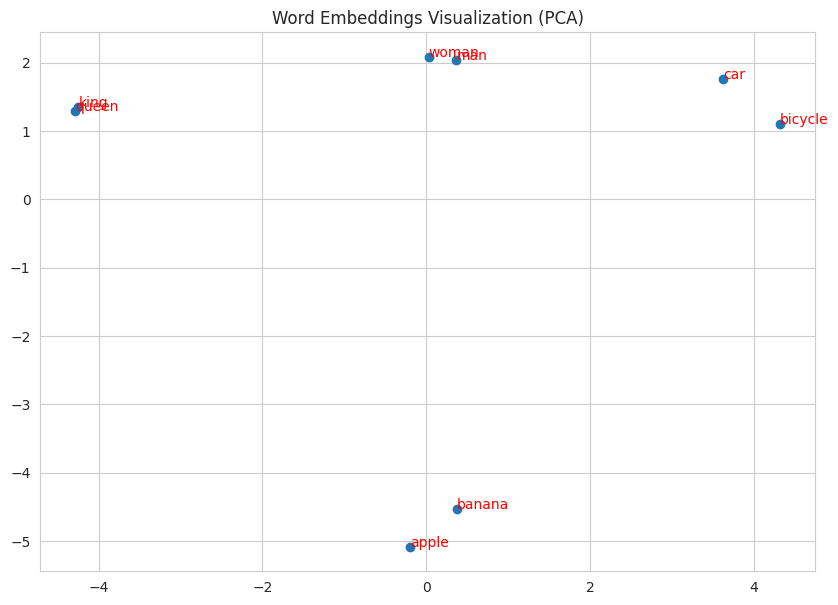

In [102]:
# PCA for 2D Visualization
pca = PCA(n_components=2)
reduced_embeddings_pca = pca.fit_transform(embeddings_to_visualize)

plt.figure(figsize=(10, 7))
plt.scatter(reduced_embeddings_pca[:, 0], reduced_embeddings_pca[:, 1])
for i, word in enumerate(words_to_visualize):
    plt.annotate(word, xy=(reduced_embeddings_pca[i, 0], reduced_embeddings_pca[i, 1]), color='red')
plt.title("Word Embeddings Visualization (PCA)")
plt.show()

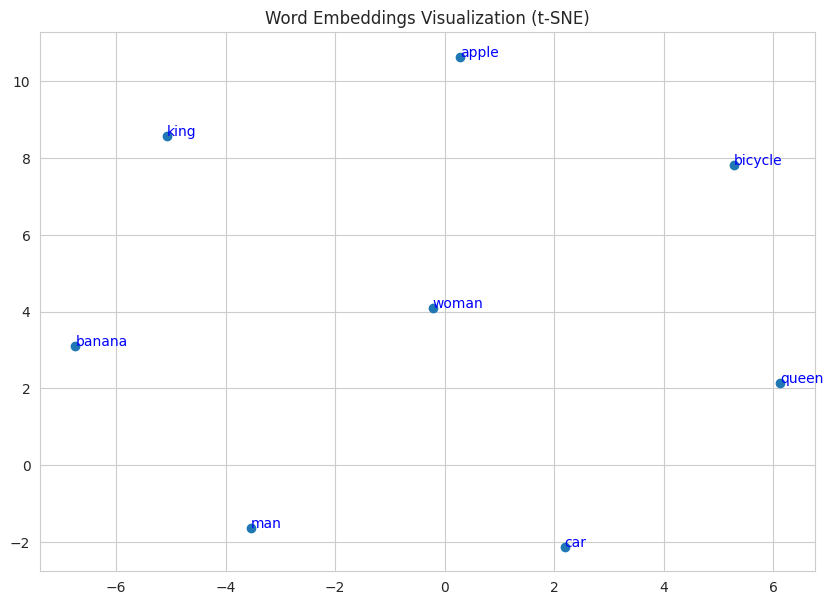

In [103]:
from sklearn.manifold import TSNE

# t-SNE for 2D Visualization
# Adjust perplexity and n_iter if needed based on the number of data points
tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(embeddings_to_visualize) - 1))
reduced_embeddings_tsne = tsne.fit_transform(embeddings_to_visualize)

plt.figure(figsize=(10, 7))
plt.scatter(reduced_embeddings_tsne[:, 0], reduced_embeddings_tsne[:, 1])
for i, word in enumerate(words_to_visualize):
    plt.annotate(word, xy=(reduced_embeddings_tsne[i, 0], reduced_embeddings_tsne[i, 1]), color='blue')
plt.title("Word Embeddings Visualization (t-SNE)")
plt.show()


## **Part 3: Designing a Novel Dissimilarity Metric**

* Define a custom dissimilarity score that goes beyond cosine similarity. Possible
approaches include:
  * Euclidean distance (How far apart words are in vector space).
  * Word entropy-based dissimilarity (How uncommon two words are relative to
each other in corpora).
  * Semantic contrast measure (Using external knowledge bases like WordNet).
  
* Either design your own metric or cite an existing one from literature (provide a proper
reference). Explain why your metric captures novelty/diversity better than cosine
similarity alone.
* Allow users to toggle between different similarity/dissimilarity measures via function
parameters.
* Visualization Requirement:
  * Plot the ranking of words based on their similarity/dissimilarity to a given word
(e.g., how words like "cat" rank against "dog," "lion," and "table" using different
metrics).
  * Use a heatmap to demonstrate and compare similarity and dissimilarity across
multiple (any number of your choice) word pairs.

In [104]:
import math
from collections import Counter
import seaborn as sns

# --- Entropy-Based Dissimilarity Metric ---
# A simplified corpus to calculate word frequencies
corpus = ["cat", "dog", "lion", "table", "kitten", "tiger", "apple", "banana", "car", "bicycle", "cat", "dog", "lion", "cat", "apple"]
word_counts = Counter(corpus)
total_words = len(corpus)
word_probabilities = {word: count / total_words for word, count in word_counts.items()}

In [105]:
def word_entropy(word, probabilities):
    prob = probabilities.get(word, 0)
    if prob == 0:
        return 0
    return -prob * math.log2(prob)

def entropy_dissimilarity(word1, word2, probabilities):
    return abs(word_entropy(word1, probabilities) - word_entropy(word2, probabilities))

In [106]:
# --- Function to Toggle Metrics ---
def calculate_metric(word1, word2, model, probabilities, metric='cosine'):
    if metric == 'cosine':
        embedding1 = model.encode(word1)
        embedding2 = model.encode(word2)
        return cosine_similarity(embedding1, embedding2)
    elif metric == 'entropy':
        return entropy_dissimilarity(word1, word2, probabilities)
    else:
        raise ValueError("Invalid metric. Choose 'cosine' or 'entropy'.")

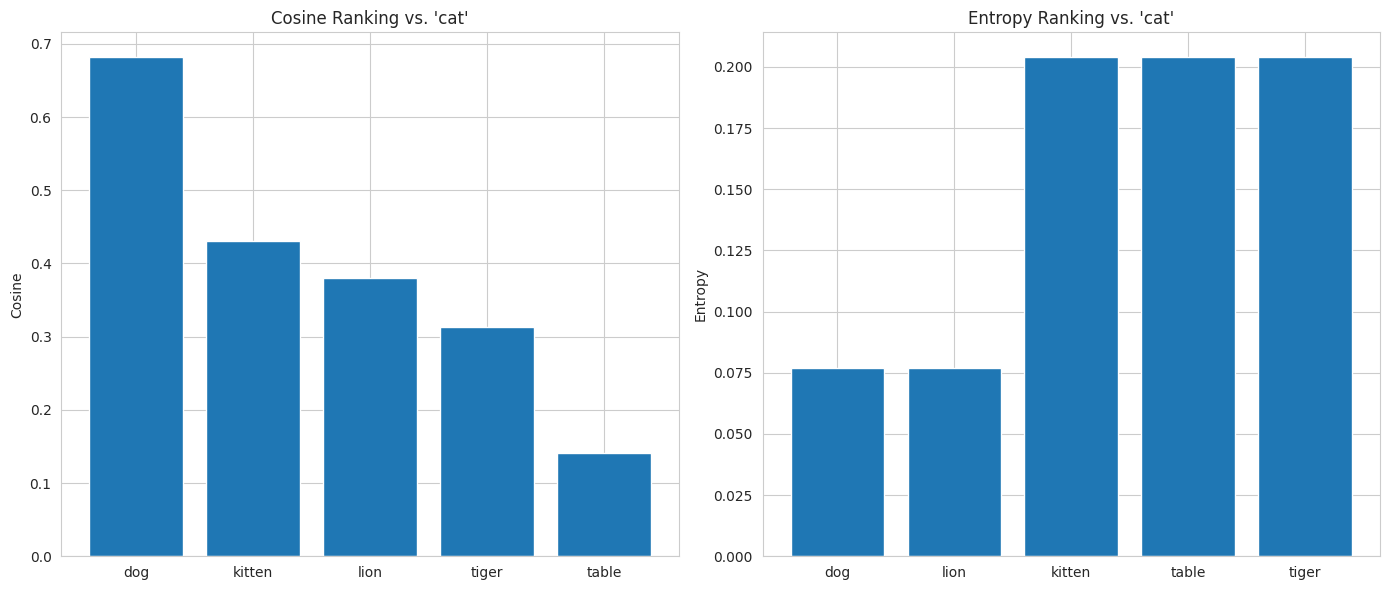

In [107]:
# --- Visualization: Ranking Plot ---
target_word = "cat"
comparison_words = ["dog", "lion", "table", "kitten", "tiger"]
metrics_to_plot = ['cosine', 'entropy']
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

for i, metric in enumerate(metrics_to_plot):
    scores = [calculate_metric(target_word, word, model, word_probabilities, metric) for word in comparison_words]
    # Sort by score (desc for similarity, asc for dissimilarity)
    descending = True if metric == 'cosine' else False
    sorted_pairs = sorted(zip(scores, comparison_words), reverse=descending)
    sorted_scores, sorted_words = zip(*sorted_pairs)

    axes[i].bar(sorted_words, sorted_scores)
    axes[i].set_title(f"{metric.title()} Ranking vs. '{target_word}'")
    axes[i].set_ylabel(metric.title())

plt.tight_layout()
plt.show()

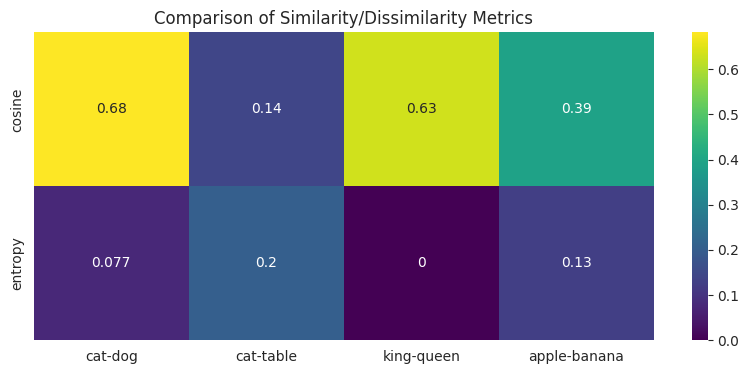

In [108]:
# --- Visualization: Heatmap ---
word_pairs_heatmap = [("cat", "dog"), ("cat", "table"), ("king", "queen"), ("apple", "banana")]
metrics = ['cosine', 'entropy']
heatmap_data = np.zeros((len(metrics), len(word_pairs_heatmap)))

for i, metric in enumerate(metrics):
    for j, pair in enumerate(word_pairs_heatmap):
        heatmap_data[i, j] = calculate_metric(pair[0], pair[1], model, word_probabilities, metric)

plt.figure(figsize=(10, 4))
sns.heatmap(heatmap_data, annot=True, cmap="viridis",
            xticklabels=[f"{p[0]}-{p[1]}" for p in word_pairs_heatmap],
            yticklabels=metrics)
plt.title("Comparison of Similarity/Dissimilarity Metrics")
plt.show()